# Winning Powerball Numbers Distribution

### What is the purpose?

This is a simple fun little analysis i wanted to make on the possible distribution of numbers picked for the Powerball lottery.
The dataset includes the winning powerball numbers(5 White balls, and 1 Red powerball) drawings from 2010 to March 2023(updated). Obviously these numbers are selected live at random during each drawing, but for fun i wanted to see if there were any patterns or outliers in certain numbers.

If you would like to grab your own updated version of this dataset you can find it [Here](https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010).

Okay, so lets begin. First we start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

We read in the csv file saved in our enviornment as a pandas dataframe. Then create a working copy to do the analysis on.

In [2]:
powerball_df = pd.read_csv("powerball_2010_2023.csv") #reading the csv file into a pandas Dataframe
working_pb_df = powerball_df.copy()     #creating a working copy to not mutate our original data
working_pb_df

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
...,...,...,...
1439,03/06/2023,02 13 29 58 69 04,3.0
1440,03/08/2023,26 27 43 61 69 04,3.0
1441,03/11/2023,11 20 33 43 58 24,2.0
1442,03/13/2023,03 10 24 46 63 04,2.0


## The data

Here we see the data were working with above. We see it contains 1444 rows of data, and it contains three columns although the one we will be working with is the Winning Numbers column. Which is a string obj of the winning powerball numbers including the powerball as the final number.

Next lets take a look at the dataframe information

In [3]:
working_pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1444 non-null   object 
 1   Winning Numbers  1444 non-null   object 
 2   Multiplier       1234 non-null   float64
dtypes: float64(1), object(2)
memory usage: 34.0+ KB


Above we see the pandas dataframe's information. We see that out of the 1444 rows the column of intrest to us, the Winning Numbers column contains all 1444 rows without any missing null data. Good.

## Selecting our Data

So, here we create a Pandas Series object by accessing the Winning Number column from our Dataframe. This is the only column of data we will be working with. We print out the Series to view the information. We see that the datatype of our data is object, in our case a string.

In [4]:
winning_nums = working_pb_df["Winning Numbers"] #grabbing the winning numbers column
winning_nums

0       11 21 27 36 62 24
1       14 18 36 49 67 18
2       18 31 36 43 47 20
3       06 24 30 53 56 19
4       05 18 23 40 50 18
              ...        
1439    02 13 29 58 69 04
1440    26 27 43 61 69 04
1441    11 20 33 43 58 24
1442    03 10 24 46 63 04
1443    16 18 33 37 50 08
Name: Winning Numbers, Length: 1444, dtype: object

## Processing our Data

This is our main chunk of code used to process our data. We want to create two dictionary objects, one for the 5 whiteball numbers and the other for the red powerballs. We will be using the collections Counter class for this purpose. This will allow us to count the frequency of each integer.

In a loop we iterate over the pandas Series creating a list. Because our data is one string we process it by stripping any whitespace and splitting the string into a list of strings. We then use a list comprehension to convert each number into an integer as another list. Afterwards we seperate the first 5 ints(The white balls) from the last number(The powerball).
Finally we update each corresponding dictionary with its respective list of values.

In [5]:
whiteballs_counter = collections.Counter()     #create dictionary counter objects to count frequencies
powerballs_counter = collections.Counter()

for winning_number in winning_nums:
    string_list = winning_number.strip().split(" ")   #strip and split the string into list of strings
    int_list = [int(val) for val in string_list]    #convert each value into an integer
    whiteballs = int_list[:5]                       #Grab the white ball numbers
    powerballs = int_list[5:]                       #Grab the red powerball number
    
    whiteballs_counter.update(whiteballs)          #update both dictionaries with their respective list of ints
    powerballs_counter.update(powerballs)

print(whiteballs_counter)
print()
print(powerballs_counter)

Counter({32: 132, 39: 132, 36: 131, 23: 129, 59: 126, 28: 125, 10: 124, 14: 120, 41: 120, 20: 119, 11: 118, 21: 118, 45: 118, 54: 118, 12: 118, 22: 118, 40: 116, 52: 116, 17: 116, 8: 116, 47: 115, 37: 114, 3: 114, 44: 113, 7: 113, 56: 112, 16: 112, 53: 111, 55: 111, 33: 111, 19: 111, 27: 110, 18: 110, 58: 109, 6: 108, 30: 108, 31: 107, 1: 107, 2: 107, 48: 107, 57: 107, 5: 106, 38: 106, 49: 105, 13: 105, 50: 104, 51: 104, 15: 103, 9: 103, 24: 101, 29: 101, 42: 100, 4: 98, 43: 97, 25: 97, 46: 96, 34: 93, 26: 92, 35: 91, 61: 83, 63: 76, 69: 76, 62: 70, 64: 68, 67: 64, 68: 61, 66: 59, 65: 58, 60: 56})

Counter({24: 66, 18: 60, 4: 53, 11: 52, 5: 51, 10: 51, 25: 51, 19: 50, 26: 50, 6: 50, 13: 50, 14: 49, 7: 49, 8: 49, 17: 48, 20: 47, 3: 46, 1: 46, 15: 46, 2: 45, 16: 45, 23: 44, 12: 44, 22: 43, 9: 43, 21: 43, 29: 27, 33: 22, 27: 19, 32: 16, 35: 15, 30: 15, 28: 14, 34: 13, 31: 11, 36: 7, 39: 6, 38: 5, 37: 3})


## Cleaning our data

Okay cool, we got our frequencies, but theres a problem. Here we see the powerball dictionary contains values up to 39, which is far larger than the current available options for the powerball. For a little bit of history, the powerball game has had different number of values to pick from during its run since its creation. The powerball lottery began in 1992 and at the time had 42 values to choose from for the powerball. That number has changed over the years changing most recently in 2015 when it droped down to the current 26 possible options. Since these values are no longer in play for future lottery games we can remove this data from our analysis.

Here we filter our powerball dictionary using a dictionary comprehension only keeping the powerball values equal to and under the current 26 possible options. 

In [6]:
filtered_powerball = {k:v for k, v in powerballs_counter.items() if k <= 26} #filter our data
filtered_powerball

{24: 66,
 18: 60,
 20: 47,
 19: 50,
 5: 51,
 23: 44,
 26: 50,
 6: 50,
 13: 50,
 14: 49,
 11: 52,
 4: 53,
 10: 51,
 7: 49,
 3: 46,
 2: 45,
 22: 43,
 9: 43,
 8: 49,
 1: 46,
 21: 43,
 16: 45,
 25: 51,
 17: 48,
 12: 44,
 15: 46}

## Plotting our results

Okay we have our data cleaned and processed. Time to plot it. Here we create a simple bar chart of our data using the matplotlib library. We create two plots, one for our white ball winning numbers, and the other for the red powerballs. We create the first plot in a subplots object to modify the figsize to make the data easier to see.

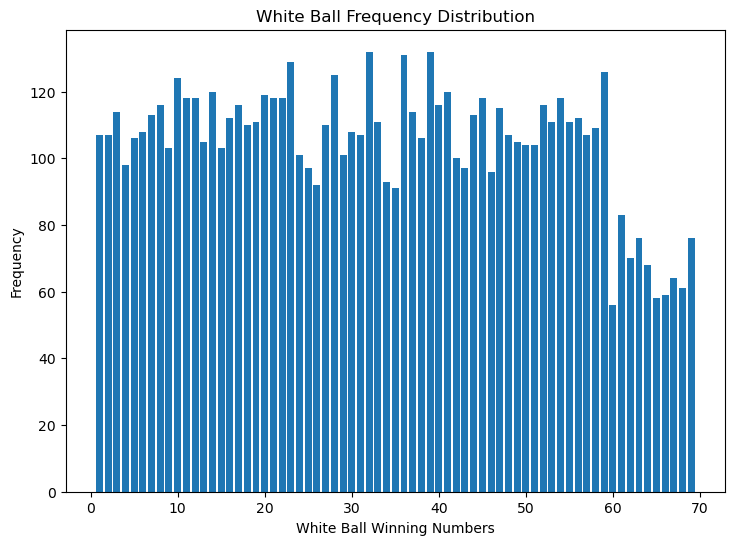

In [7]:
fig, ax = plt.subplots(figsize=(8.5, 6))     #create a subplots for plotting whiteballs data
ax.bar(whiteballs_counter.keys(), whiteballs_counter.values(), width=0.8)    #create a bar chart 

#set the plot title, x and y axis labels
ax.set_xlabel("White Ball Winning Numbers")
ax.set_ylabel("Frequency")
ax.set_title("White Ball Frequency Distribution")
plt.show()

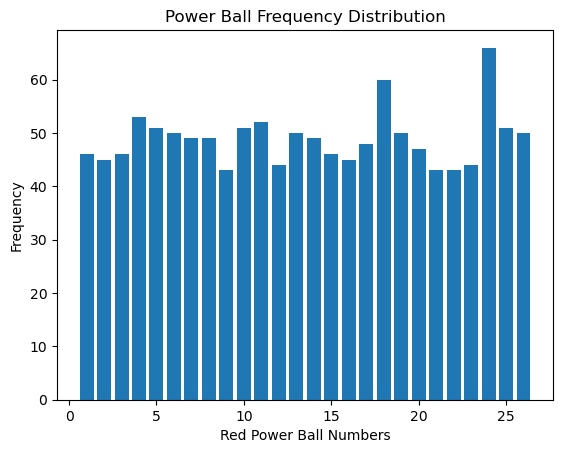

In [8]:
plt.bar(filtered_powerball.keys(), filtered_powerball.values())
plt.title("Power Ball Frequency Distribution")
plt.xlabel("Red Power Ball Numbers")
plt.ylabel("Frequency")
plt.show()

## Results

Plotting our data shows some interesting insights. For the first plot of the white balls we see that the distribution of our data is somewhat uniform with some numbers being picked a little higher than the others. We also see that apparently the numbers larger than 59 tend to appear far less than the rest of the data. The top two appearing numbers were 32, 39 both with a frequency of 132 occurances.

The second plot, our powerball distribution also appears to be prety uniform aswell which makes sense as the numbers are chosen at random. There is one number that appear more than the others that being 24 with a frequency of 66 occurances with the second highest frequency being 18 with 60 occurances.

# Time to win the lottery??

As a fun little conclusion to this experiment lets determine what would be the best possible set of numbers to play in the lottery. The following five white ball numbers and one red powerball numbers were the top highest occuring in the dataset meaning these numbers tend to be chosen the most often. These are: **_Whiteballs- 23, 32, 36, 39, 59 and the powerball of 24_**. In conclusion to increase your chances of winning the lottery, playing these numbers might be the best possible strategy also dont choose any number larger than 59.

There you have it. If you happen to win the lottery with these numbers Congratulations!!! You can send me my share of the jackpot.
